In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
file_name = 'C:/Users/ksa/Downloads/universal_top_spotify_songs.csv'
df = pd.read_csv(file_name)
print(df)

                     spotify_id                               name  \
0        2RkZ5LkEzeHGRsmDqKwmaJ                           Ordinary   
1        42UBPzRMh5yyz0EDPr6fr1                           Manchild   
2        0FTmksd2dxiE5e3rWyJXs6                    back to friends   
3        7so0lgd0zP2Sbgs2d7a1SZ                   Die With A Smile   
4        6dOtVTDdiauQNBQEDOtlAB                 BIRDS OF A FEATHER   
...                         ...                                ...   
2110311  0AYt6NMyyLd0rLuvr0UkMH          Slime You Out (feat. SZA)   
2110312  2Gk6fi0dqt91NKvlzGsmm7  SAY MY GRACE (feat. Travis Scott)   
2110313  26b3oVLrRUaaybJulow9kz                             People   
2110314  5ydjxBSUIDn26MFzU3asP4                         Rainy Days   
2110315  59NraMJsLaMCVtwXTSia8i                              Prada   

                             artists  daily_rank  daily_movement  \
0                        Alex Warren           1               1   
1                  Sabr

In [53]:
df.columns = df.columns.str.strip()
print('Raw Column:',df.columns.tolist())

Raw Column: ['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement', 'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms', 'album_name', 'album_release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [54]:
# rename columns
df.rename(columns={
    'spotify_id': 'spotify_id',
    'name': 'song_name',
    'artists': 'artists',
    'daily_rank': 'daily_rank_top50list' ,
    'daily_movement' : 'daily_rank_movement',
    'weekly_movement' : 'weekly_rank_movement',
    'country' : 'country',
    'snapshot_date': 'snapshot_date_fromAPI',
    'popularity' : 'song_popularity',
    'is_explicit' : 'is_explicit',
    'duration_ms' : 'duration_milliseconds',
    'album_name' : 'album_name',
    'album_release_date' : 'album_release_date',
    'danceability' : 'danceability', 
    'energy' : 'energy_song_activity_level',
    'key' : 'song_key',
    'loudness' : 'loudness_dB',
    'mode' : 'mode_major_minor',
    'speechiness' : 'speechiness',
    'acousticness' : 'acousticness',
    'instrumentalness' : 'instrumentalness',
    'liveness' : 'liveness',
    'valence' : 'valence_positiveness',
    'tempo' : 'tempo_BPM',
    'time_signature' : 'time_signature'
}, inplace=True)
print('Renamed Column:',df.columns.tolist())

Renamed Column: ['spotify_id', 'song_name', 'artists', 'daily_rank_top50list', 'daily_rank_movement', 'weekly_rank_movement', 'country', 'snapshot_date_fromAPI', 'song_popularity', 'is_explicit', 'duration_milliseconds', 'album_name', 'album_release_date', 'danceability', 'energy_song_activity_level', 'song_key', 'loudness_dB', 'mode_major_minor', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence_positiveness', 'tempo_BPM', 'time_signature']


In [55]:
#data cleaning and type conversion
if 'spotify_id' in df.columns:
    df['spotify_id'] = df['spotify_id'].astype(str)
if 'song_name' in df.columns:
    df['song_name'] = df['song_name'].astype(str)
if 'artists' in df.columns:
    df['artists'] = df['artists'].astype(str)
if 'daily_rank_movement' in df.columns:
    df['daily_rank_movement'] = pd.to_numeric(df['daily_rank_movement'], errors='coerce')
if 'weekly_rank_movement' in df.columns:
    df['weekly_rank_movement'] = pd.to_numeric(df['weekly_rank_movement'], errors='coerce')
if 'country' in df.columns:
    df['country'] = df['country'].astype(str)
if 'snapshot_date_fromAPI' in df.columns:
    df['snapshot_date_fromAPI'] = pd.to_datetime(df['snapshot_date_fromAPI'], errors='coerce')
if 'song_popularity' in df.columns:
    df['song_popularity'] = pd.to_numeric(df['song_popularity'], errors='coerce')
if 'is_explicit' in df.columns:
    df['is_explicit'] = df['is_explicit'].astype(bool)
if 'duration_milliseconds' in df.columns:
    df['duration_milliseconds'] = pd.to_numeric(df['duration_milliseconds'], errors='coerce')
if 'album_name' in df.columns:
    df['album_name'] = df['album_name'].astype(str)
if 'album_release_date' in df.columns:
    df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
if 'danceability' in df.columns:
    df['danceability'] = df['danceability'].astype(float)
if 'energy_song_activity_level' in df.columns:
    df['energy_song_activity_level'] = df['energy_song_activity_level'].astype(float)
if 'song_key' in df.columns:
    df['song_key'] = pd.to_numeric(df['song_key'], errors='coerce')
if 'loudness_dB' in df.columns:
    df['loudness_dB'] = df['loudness_dB'].astype(float)
if 'mode_major_minor' in df.columns:
    df['mode_major_minor'] = pd.to_numeric(df['mode_major_minor'], errors='coerce')
if 'speechiness' in df.columns:
    df['speechiness'] = df['speechiness'].astype(float)
if 'acousticness' in df.columns:
    df['acousticness'] = df['acousticness'].astype(float)
if 'instrumentalness' in df.columns:
    df['instrumentalness'] = df['instrumentalness'].astype(float)
if 'liveness' in df.columns:
    df['liveness'] = df['liveness'].astype(float)
if 'valence_positiveness' in df.columns:
    df['valence_positiveness'] = df['valence_positiveness'].astype(float)
if 'tempo_BPM' in df.columns:
    df['tempo_BPM'] = df['tempo_BPM'].astype(float)
if 'time_signature' in df.columns:
    df['time_signature'] = pd.to_numeric(df['time_signature'], errors='coerce')

print(df.dtypes)
print(df.head(10))


spotify_id                            object
song_name                             object
artists                               object
daily_rank_top50list                   int64
daily_rank_movement                    int64
weekly_rank_movement                   int64
country                               object
snapshot_date_fromAPI         datetime64[ns]
song_popularity                        int64
is_explicit                             bool
duration_milliseconds                  int64
album_name                            object
album_release_date            datetime64[ns]
danceability                         float64
energy_song_activity_level           float64
song_key                               int64
loudness_dB                          float64
mode_major_minor                       int64
speechiness                          float64
acousticness                         float64
instrumentalness                     float64
liveness                             float64
valence_po

In [56]:
#missing value analysis
missing_values = df.isnull().sum()
print("Missing values in each column:", missing_values)

Missing values in each column: spotify_id                      0
song_name                       0
artists                         0
daily_rank_top50list            0
daily_rank_movement             0
weekly_rank_movement            0
country                         0
snapshot_date_fromAPI           0
song_popularity                 0
is_explicit                     0
duration_milliseconds           0
album_name                      0
album_release_date            659
danceability                    0
energy_song_activity_level      0
song_key                        0
loudness_dB                     0
mode_major_minor                0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence_positiveness            0
tempo_BPM                       0
time_signature                  0
dtype: int64


In [57]:
#check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [58]:
# fill missing country with 'N/A'
if 'country' in df.columns:
    df['country'] = df['country'].fillna('N/A')
print(df['country'].value_counts())

country
DO    29176
IT    29174
NI    29170
PL    29164
HU    29163
      ...  
VN    28406
UY    28403
LU    28315
VE    28263
GB    20919
Name: count, Length: 73, dtype: int64


In [59]:
# fill missing album_release_date with 'N/A'
df['album_release_date'] = df['album_release_date'].fillna('N/A')
print(df['album_release_date'].value_counts())

album_release_date
2024-05-17    34806
2025-01-05    30650
2023-09-15    28568
2024-04-05    27228
2023-12-01    26208
              ...  
2008-05-27        1
2013-08-30        1
2014-06-06        1
2006-02-24        1
2021-01-05        1
Name: count, Length: 2974, dtype: int64


In [60]:
#missing album name analysis
df['album_name'] = df['album_name'].isnull().sum()
print("Number of missing album names:", df['album_name'])

Number of missing album names: 0          0
1          0
2          0
3          0
4          0
          ..
2110311    0
2110312    0
2110313    0
2110314    0
2110315    0
Name: album_name, Length: 2110316, dtype: int64


In [61]:
# drop missing rows with missing song_name,artists,country,album_release_date
Cleaned_data = df.dropna(subset=['song_name', 'artists', 'country', 'album_release_date'])
df.reset_index(drop=True, inplace=True)
print(Cleaned_data)
print(Cleaned_data[['song_name', 'artists', 'country', 'album_release_date']].isnull().sum())
#for future use and reference
#Cleaned_data.to_csv('C:/Users/ksa/Documents/Python projects/prac/cleaned_universal_top_spotify_songs.csv', index=False)

                     spotify_id                          song_name  \
0        2RkZ5LkEzeHGRsmDqKwmaJ                           Ordinary   
1        42UBPzRMh5yyz0EDPr6fr1                           Manchild   
2        0FTmksd2dxiE5e3rWyJXs6                    back to friends   
3        7so0lgd0zP2Sbgs2d7a1SZ                   Die With A Smile   
4        6dOtVTDdiauQNBQEDOtlAB                 BIRDS OF A FEATHER   
...                         ...                                ...   
2110311  0AYt6NMyyLd0rLuvr0UkMH          Slime You Out (feat. SZA)   
2110312  2Gk6fi0dqt91NKvlzGsmm7  SAY MY GRACE (feat. Travis Scott)   
2110313  26b3oVLrRUaaybJulow9kz                             People   
2110314  5ydjxBSUIDn26MFzU3asP4                         Rainy Days   
2110315  59NraMJsLaMCVtwXTSia8i                              Prada   

                             artists  daily_rank_top50list  \
0                        Alex Warren                     1   
1                  Sabrina Carpente

In [62]:
# UNIQUE country
unique_countries = Cleaned_data['country'].unique()
number_of_countries = Cleaned_data['country'].nunique()
print("Unique countries in the dataset:", unique_countries)
print("Number of unique countries in the dataset:", number_of_countries)

Unique countries in the dataset: ['nan' 'ZA' 'VN' 'VE' 'UY' 'US' 'UA' 'TW' 'TR' 'TH' 'SV' 'SK' 'SG' 'SE'
 'SA' 'RO' 'PY' 'PT' 'PL' 'PK' 'PH' 'PE' 'PA' 'NZ' 'NO' 'NL' 'NI' 'NG'
 'MY' 'MX' 'MA' 'LV' 'LU' 'LT' 'KZ' 'KR' 'JP' 'IT' 'IS' 'IN' 'IL' 'IE'
 'ID' 'HU' 'HN' 'HK' 'GT' 'GR' 'FR' 'FI' 'ES' 'EG' 'EE' 'EC' 'DO' 'DK'
 'DE' 'CZ' 'CR' 'CO' 'CL' 'CH' 'CA' 'BY' 'BR' 'BO' 'BG' 'BE' 'AU' 'AT'
 'AR' 'AE' 'GB']
Number of unique countries in the dataset: 73


Top 10 songs in US based on average popularity:
song_name
greedy                        98.731183
BIRDS OF A FEATHER            97.309783
Strangers                     96.961538
Cruel Summer                  96.762712
La Diabla                     96.679612
My Love Mine All Mine         96.247475
Gata Only                     96.146789
MONACO                        96.081967
DtMF                          96.034722
i like the way you kiss me    95.937500
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1621858590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_songs.values, y=top_10_songs.index, palette='viridis',color='cyan')


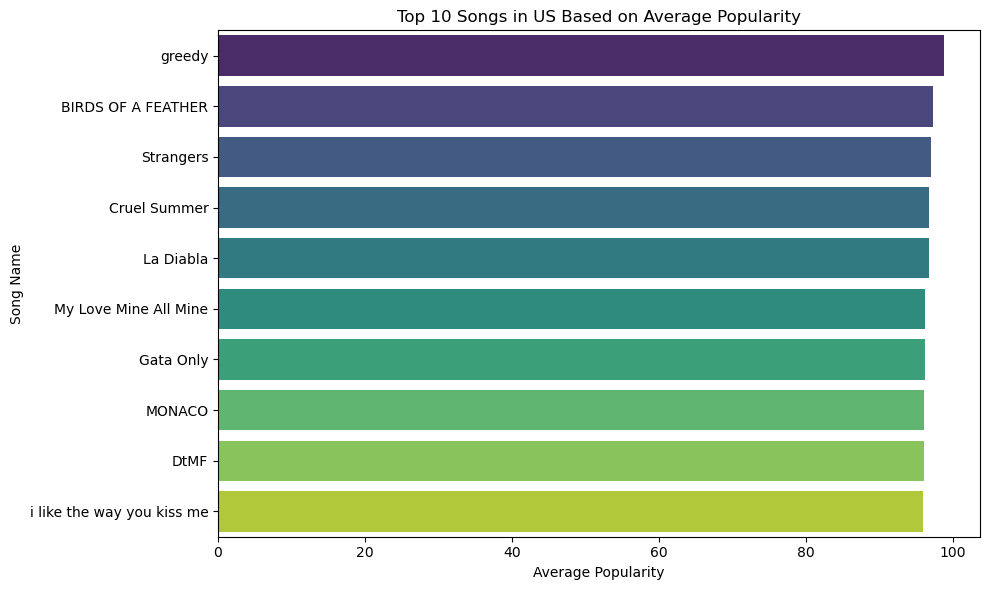

Top 10 songs in HK based on average popularity:
song_name
i like the way you kiss me           100.000000
greedy                                98.617347
Lovin On Me                           98.555556
My Love Mine All Mine                 98.097561
Strangers                             97.833333
End of Beginning                      97.823529
All I Want for Christmas Is You       97.560976
BIRDS OF A FEATHER                    97.303763
back to friends                       97.272727
Rockin' Around The Christmas Tree     96.866667
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1621858590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_songs.values, y=top_10_songs.index, palette='viridis',color='cyan')


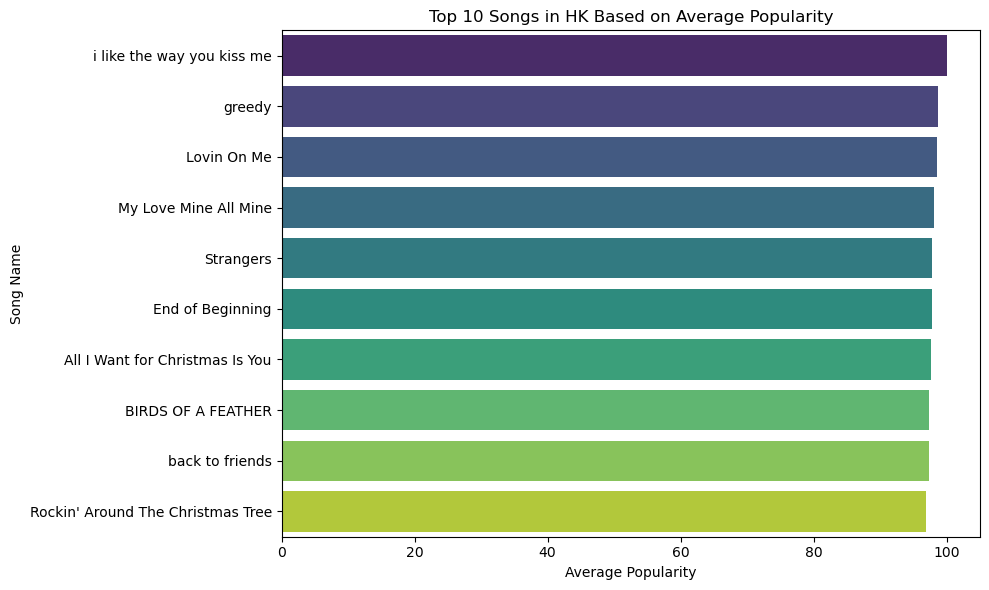

Top 10 songs in IN based on average popularity:
song_name
Espresso                                                97.586957
I Wanna Be Yours                                        95.000000
Die With A Smile                                        93.416244
APT.                                                    90.329897
Who                                                     89.666667
Big Dawgs                                               89.285714
Perfect                                                 89.000000
blue                                                    87.931818
Night Changes                                           87.666667
Bye Bye Bye - From Deadpool and Wolverine Soundtrack    86.793103
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1621858590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_songs.values, y=top_10_songs.index, palette='viridis',color='cyan')


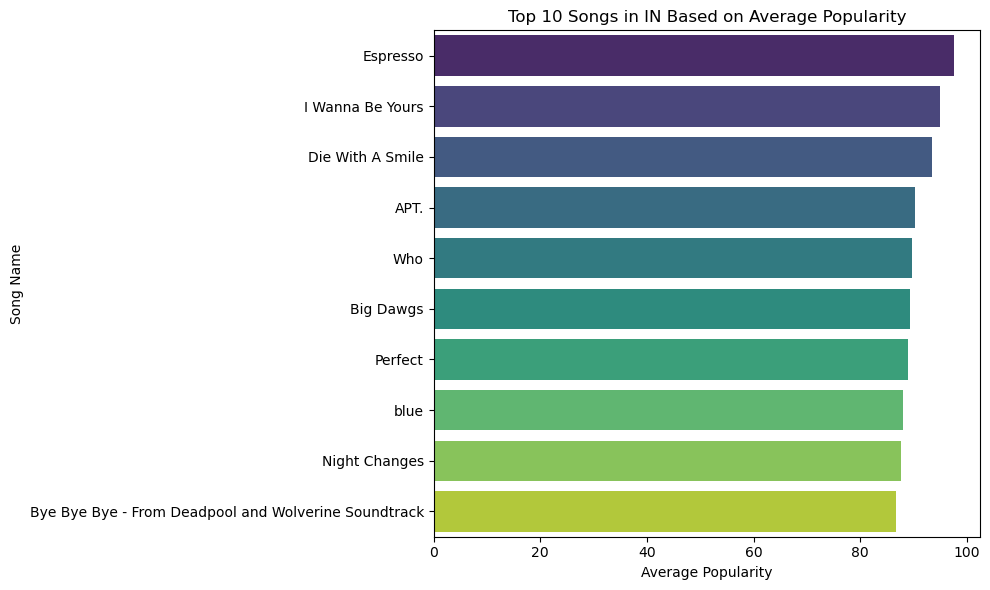

Top 10 songs in FR based on average popularity:
song_name
Cruel Summer                       98.787234
greedy                             98.676923
Lovin On Me                        98.666667
Good Luck, Babe!                   97.000000
End of Beginning                   96.937500
BIRDS OF A FEATHER                 96.782759
DtMF                               96.633094
All I Want for Christmas Is You    96.500000
Strangers                          96.446043
Santa Tell Me                      96.000000
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1621858590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_songs.values, y=top_10_songs.index, palette='viridis',color='cyan')


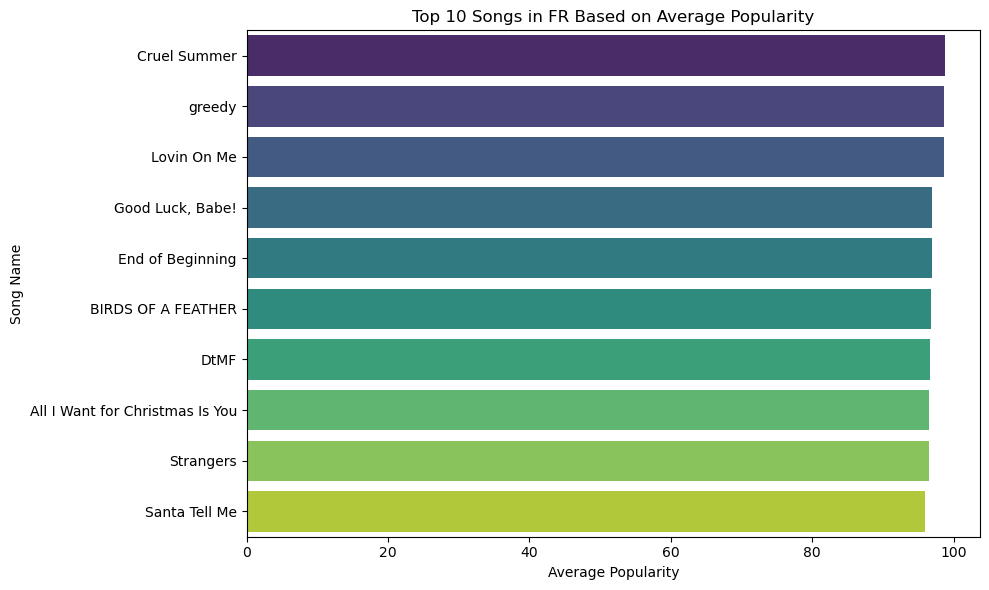

Top 10 songs in JP based on average popularity:
song_name
Cruel Summer                         98.000000
All I Want for Christmas Is You      97.615385
Slow Dancing                         96.000000
like JENNIE                          95.600000
Rockin' Around The Christmas Tree    95.500000
Standing Next to You                 95.025641
Santa Tell Me                        94.538462
Jingle Bell Rock                     93.000000
Super Shy                            91.158730
Who                                  90.566343
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1621858590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_songs.values, y=top_10_songs.index, palette='viridis',color='cyan')


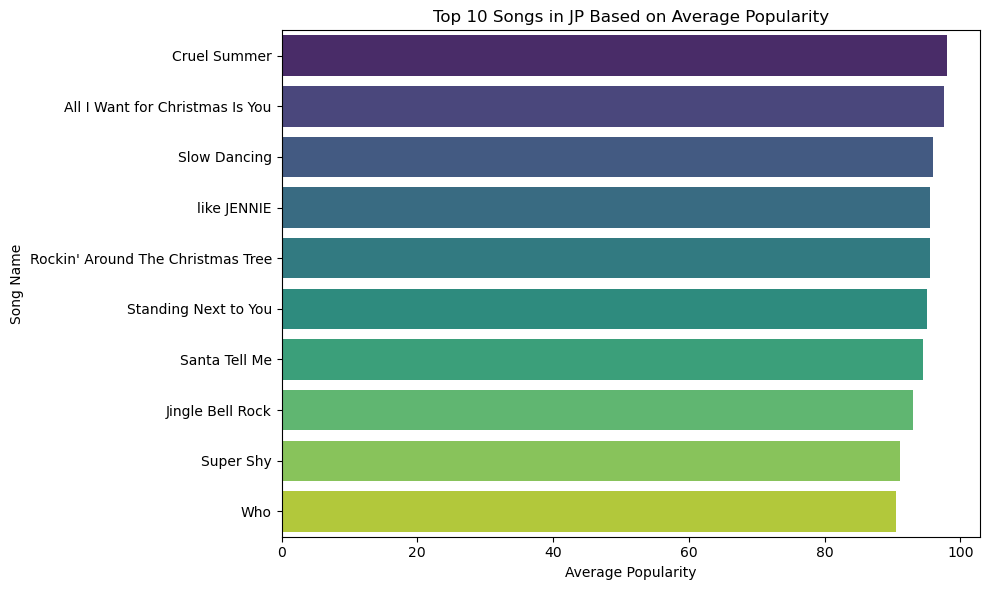

Top 10 songs in BR based on average popularity:
song_name
greedy                             99.416667
i like the way you kiss me         99.125000
All I Want for Christmas Is You    98.500000
Cruel Summer                       98.428571
End of Beginning                   98.000000
BIRDS OF A FEATHER                 97.252632
Espresso                           96.181818
Last Christmas                     95.500000
Die With A Smile                   94.241007
Ordinary                           93.692308
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1621858590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_songs.values, y=top_10_songs.index, palette='viridis',color='cyan')


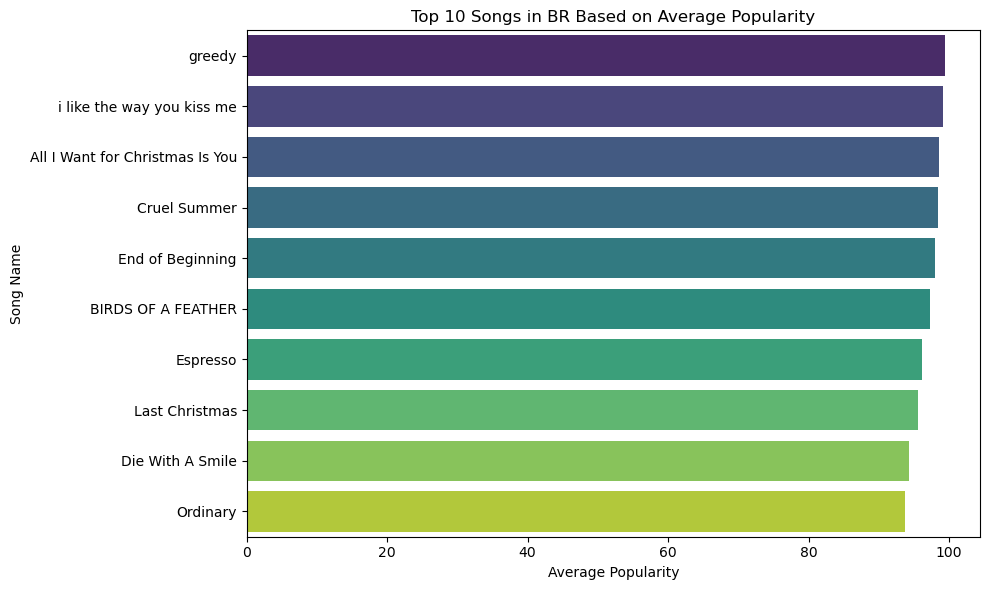

In [63]:
# top 10 songs in each country based on average popularity
countries = ['US','HK','IN','FR','JP','BR']

for country in countries:
    by_country = Cleaned_data[Cleaned_data['country'] == country]
    top_10_songs = (by_country.groupby('song_name')['song_popularity'].mean().sort_values(ascending=False).head(10))
    print(f"Top 10 songs in {country} based on average popularity:")
    print(top_10_songs)

#plotting top 10 songs in each country based on average popularity
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_10_songs.values, y=top_10_songs.index, palette='viridis',color='cyan')
    plt.title(f'Top 10 Songs in {country} Based on Average Popularity')
    plt.xlabel('Average Popularity')
    plt.ylabel('Song Name')
    plt.tight_layout()
    plt.show()
    

Top 10 songs overall based on average popularity:                                             song_artists  song_popularity
20315                                greedy - Tate McRae        98.000469
1891                  BIRDS OF A FEATHER - Billie Eilish        97.316500
4976                                    DtMF - Bad Bunny        96.061103
3914                         Cruel Summer - Taylor Swift        96.053742
11956                     My Love Mine All Mine - Mitski        95.965286
16175                       Si No Estás - iñigo quintero        95.814444
10405                          Lovin On Me - Jack Harlow        95.401249
2982   CARNIVAL - ¥$, Kanye West, Ty Dolla $ign, Rich...        95.325092
4682            Die With A Smile - Lady Gaga, Bruno Mars        94.902469
16772                            Strangers - Kenya Grace        94.821901


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1464877561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10,x='song_popularity', y='song_artists', palette='viridis', color='blue')


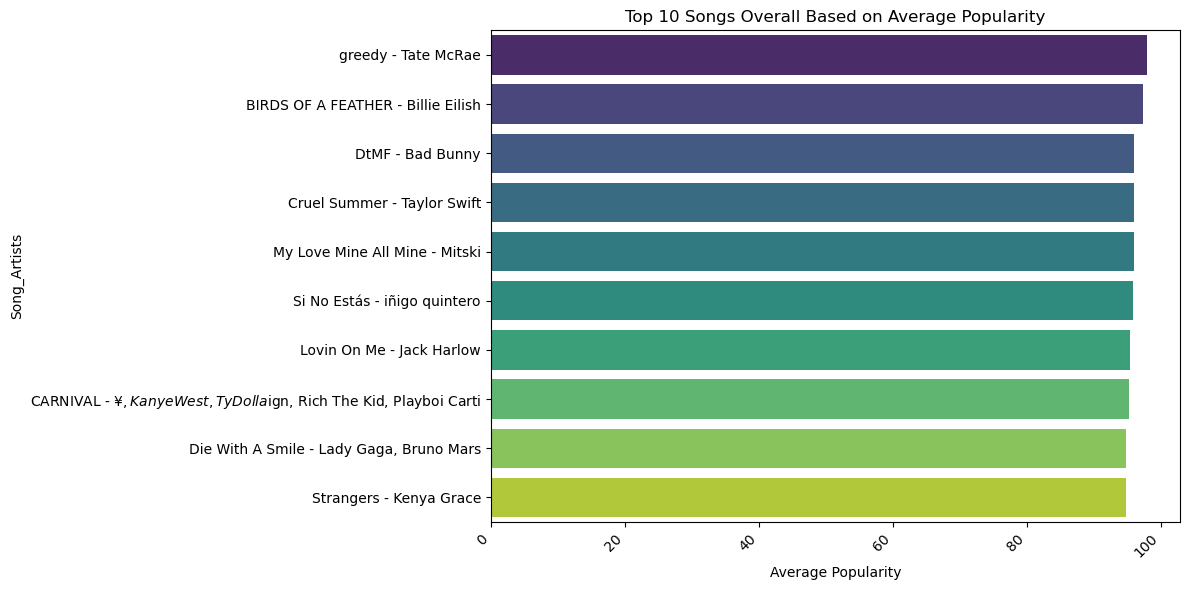

In [64]:
# song average popularity
song_artists = Cleaned_data['song_name'] + ' - ' + Cleaned_data['artists']
Cleaned_data['song_artists'] = song_artists
average_popularity = (Cleaned_data.groupby('song_artists')['song_popularity'].mean().reset_index().sort_values(by='song_popularity',ascending=False))
top_10 = average_popularity.head(10)
print("Top 10 songs overall based on average popularity:", top_10)

#plotting top 10 songs overall based on average popularity
plt.figure(figsize=(12,6))
sns.barplot(data=top_10,x='song_popularity', y='song_artists', palette='viridis', color='blue')
plt.title('Top 10 Songs Overall Based on Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Song_Artists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
#split artists into lists and explode them into separate rows
Cleaned_data['artist_list'] = Cleaned_data['artists'].str.split(',')
exploded_data = Cleaned_data.explode('artist_list').rename(columns={'artist_list': 'artist'})
print(exploded_data)

                     spotify_id         song_name  \
0        2RkZ5LkEzeHGRsmDqKwmaJ          Ordinary   
1        42UBPzRMh5yyz0EDPr6fr1          Manchild   
2        0FTmksd2dxiE5e3rWyJXs6   back to friends   
3        7so0lgd0zP2Sbgs2d7a1SZ  Die With A Smile   
3        7so0lgd0zP2Sbgs2d7a1SZ  Die With A Smile   
...                         ...               ...   
2110313  26b3oVLrRUaaybJulow9kz            People   
2110314  5ydjxBSUIDn26MFzU3asP4        Rainy Days   
2110315  59NraMJsLaMCVtwXTSia8i             Prada   
2110315  59NraMJsLaMCVtwXTSia8i             Prada   
2110315  59NraMJsLaMCVtwXTSia8i             Prada   

                             artists  daily_rank_top50list  \
0                        Alex Warren                     1   
1                  Sabrina Carpenter                     2   
2                              sombr                     3   
3              Lady Gaga, Bruno Mars                     4   
3              Lady Gaga, Bruno Mars                 

Top 10 artists based on average popularity:                artist  song_popularity
11344          Mitski        95.944345
14075  iñigo quintero        95.814444
9749      Jack Harlow        95.326833
10216     Kenya Grace        94.821901
5007     Rich The Kid        94.749112
8552              Djo        94.498574
7696    Billie Eilish        94.106970
7807       Brenda Lee        93.196941
8397    David Kushner        93.133445
11088    Mariah Carey        93.013977


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\1673522024.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='song_popularity', y='artist', palette='magma', color='orange')


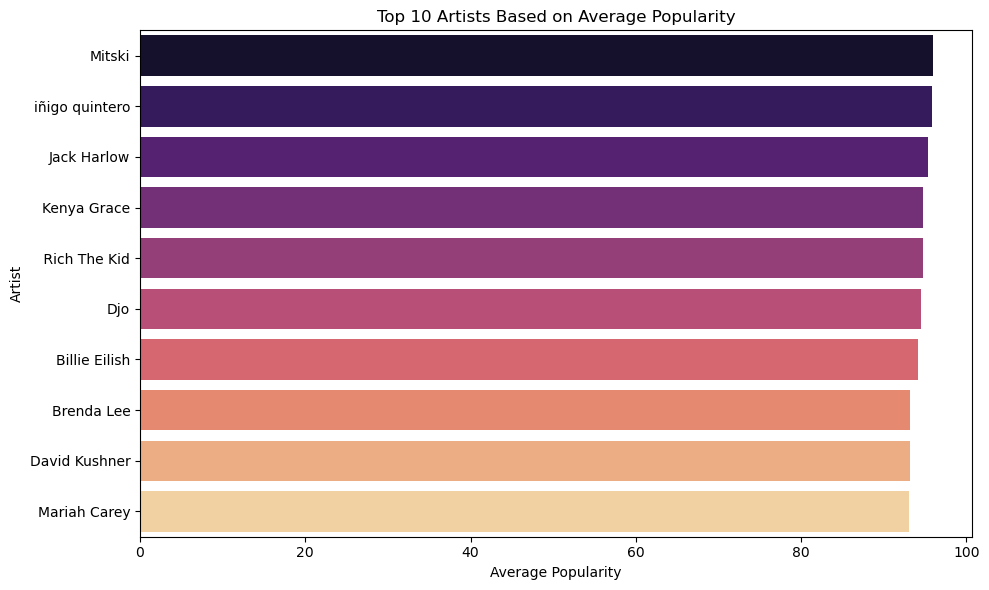

In [66]:
# top 10 artists based on average popularity
top_artists = (exploded_data.groupby('artist')['song_popularity'].mean().reset_index().sort_values(by='song_popularity', ascending=False).head(10))
print("Top 10 artists based on average popularity:", top_artists)
# plotting top 10 artists based on average popularity
plt.figure(figsize=(10,6))
sns.barplot(data=top_artists, x='song_popularity', y='artist', palette='magma', color='orange')
plt.title('Top 10 Artists Based on Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [67]:
# extracting unique artists
unique_artists = exploded_data['artist'].unique()  
print("Unique artists in the dataset:", unique_artists[:10])

Unique artists in the dataset: ['Alex Warren' 'Sabrina Carpenter' 'sombr' 'Lady Gaga' ' Bruno Mars'
 'Billie Eilish' 'Jin' 'W Sound' ' Beéle' ' Ovy On The Drums']


Top songs by  Bruno Mars in US based on average popularity:
song_name
Die With A Smile    94.169065
APT.                89.902703
Fat Juicy & Wet     67.111111
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\760970698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_artist.values, y=top_songs_artist.index, palette='coolwarm', color='green')


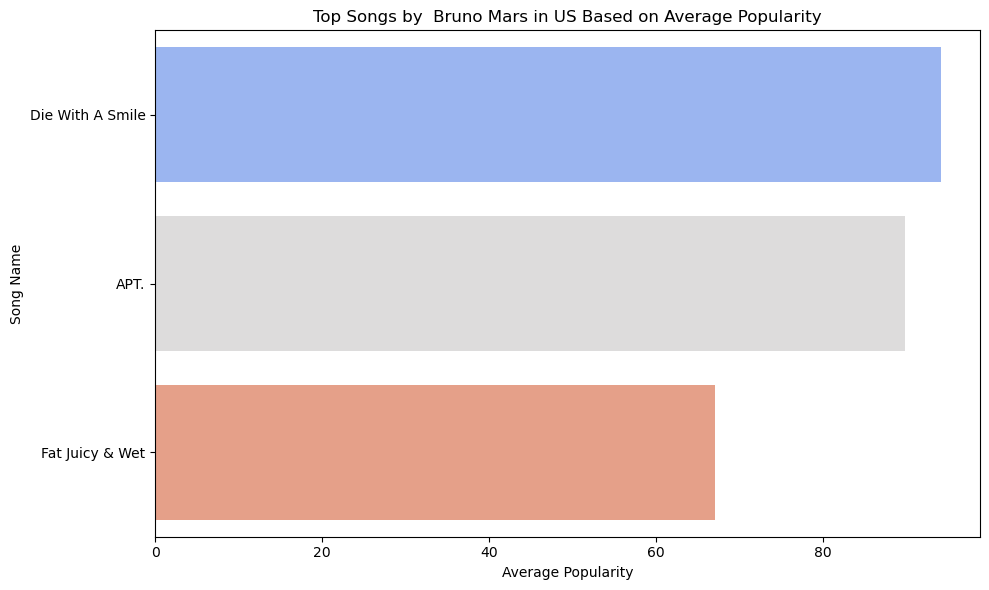

Top songs by  Bruno Mars in HK based on average popularity:
song_name
Die With A Smile      94.227758
APT.                  90.281106
That's What I Like    87.000000
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\760970698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_artist.values, y=top_songs_artist.index, palette='coolwarm', color='green')


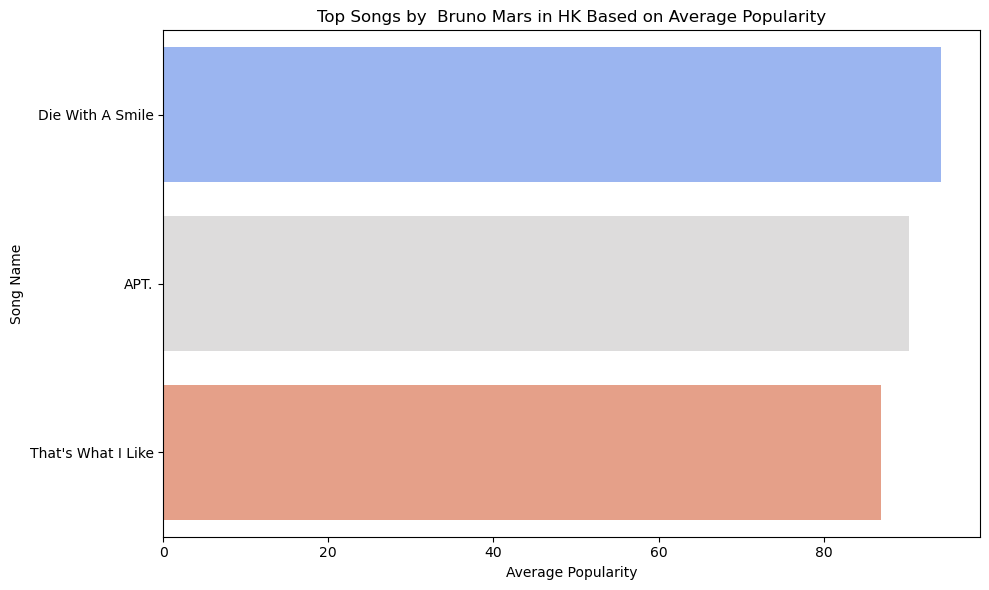

Top songs by  Bruno Mars in IN based on average popularity:
song_name
Die With A Smile    93.416244
APT.                90.329897
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\760970698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_artist.values, y=top_songs_artist.index, palette='coolwarm', color='green')


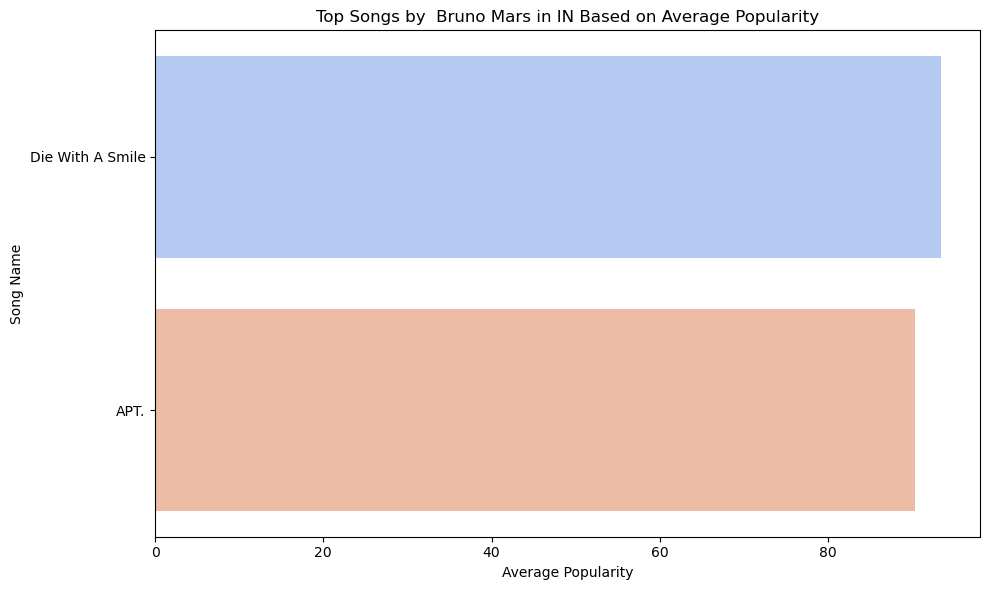

Top songs by  Bruno Mars in FR based on average popularity:
song_name
Die With A Smile    95.459227
APT.                90.386139
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\760970698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_artist.values, y=top_songs_artist.index, palette='coolwarm', color='green')


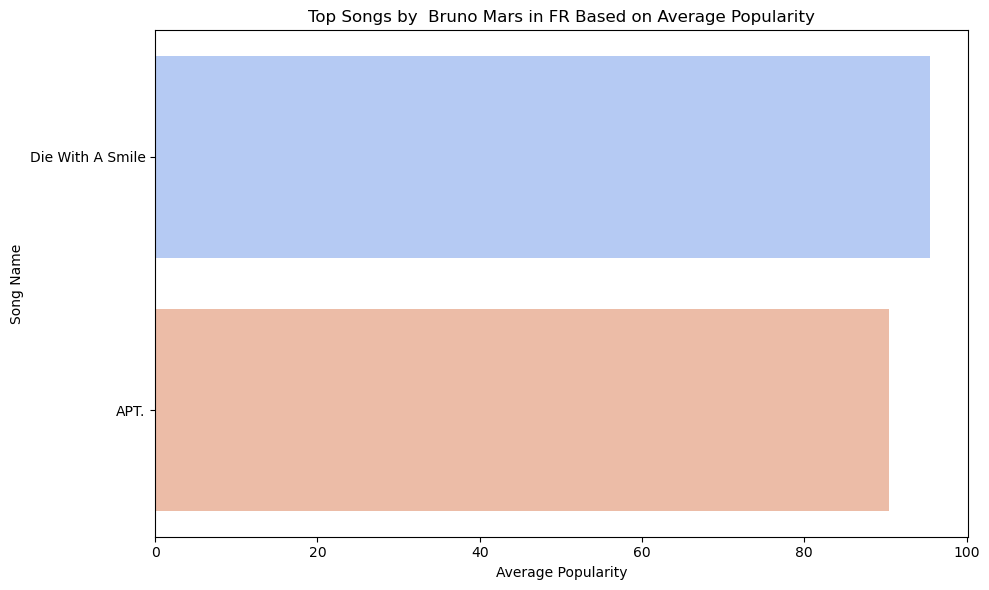

Top songs by  Bruno Mars in JP based on average popularity:
song_name
APT.    90.347222
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\760970698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_artist.values, y=top_songs_artist.index, palette='coolwarm', color='green')


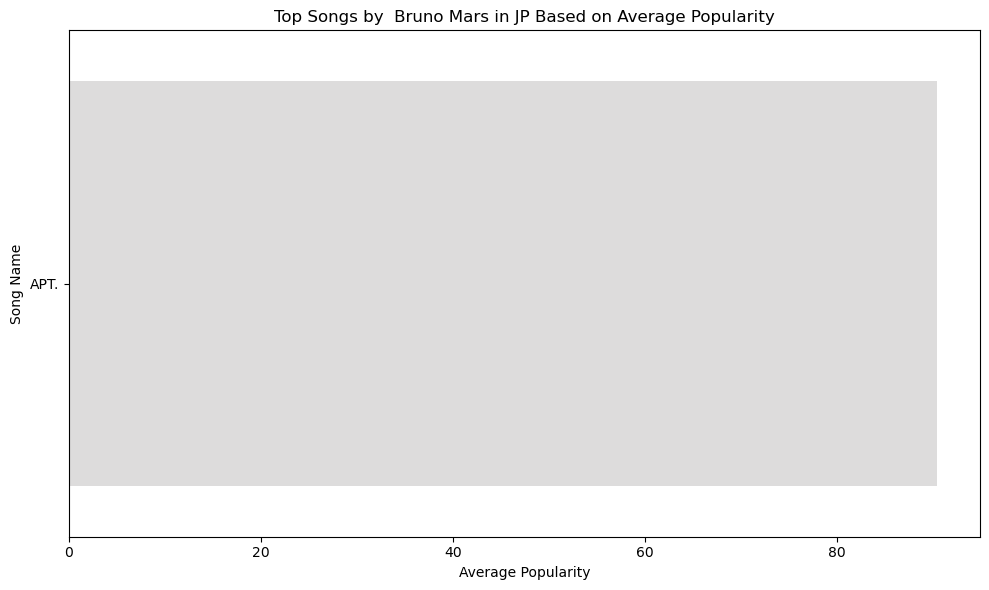

Top songs by  Bruno Mars in BR based on average popularity:
song_name
Die With A Smile        94.241007
APT.                    91.275862
Locked out of Heaven    87.700000
That's What I Like      86.800000
Name: song_popularity, dtype: float64


C:\Users\ksa\AppData\Local\Temp\ipykernel_17268\760970698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_artist.values, y=top_songs_artist.index, palette='coolwarm', color='green')


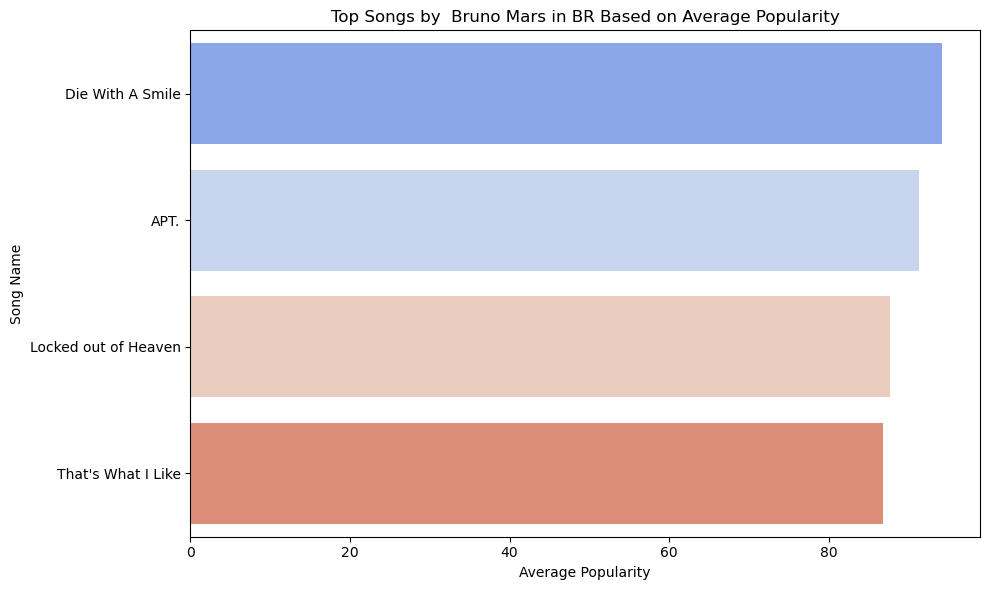

In [68]:
#top songs in each country in countries by artist
artist = ' Bruno Mars'

for country in countries:
    by_country_artist = exploded_data[(exploded_data['country'] == country) & (exploded_data['artist'].str.strip() == artist.strip())]
    top_songs_artist = (by_country_artist.groupby('song_name')['song_popularity'].mean().sort_values(ascending=False).head(5))
    print(f"Top songs by {artist} in {country} based on average popularity:")
    print(top_songs_artist)

# plotting top songs by artist in each country
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_songs_artist.values, y=top_songs_artist.index, palette='coolwarm', color='green')
    plt.title(f'Top Songs by {artist} in {country} Based on Average Popularity')
    plt.xlabel('Average Popularity')
    plt.ylabel('Song Name')
    plt.tight_layout()
    plt.show()